# Lecture 7

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import io
from skimage.exposure import equalize_hist

In [2]:
plt.rcParams['image.cmap']='gray'
plt.rcParams['figure.figsize']=[15,8]

In [3]:
I = io.imread('watch.jpg')
I = equalize_hist(I)

### Image noise

In [4]:
from skimage import util, img_as_ubyte

In [5]:
J = util.random_noise(I,'gaussian')

In [6]:
J = img_as_ubyte(J)

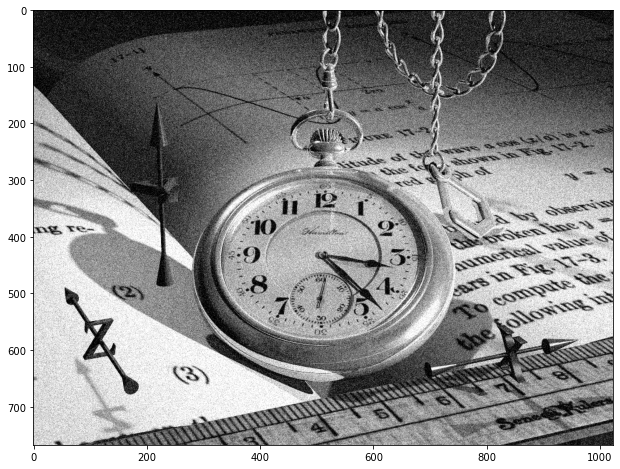

In [7]:
plt.imshow(J)

### Arithmetic and geometric mean filters

In [8]:
from skimage import filters

In [9]:
A = filters.rank.mean(J,np.ones((5,5)))

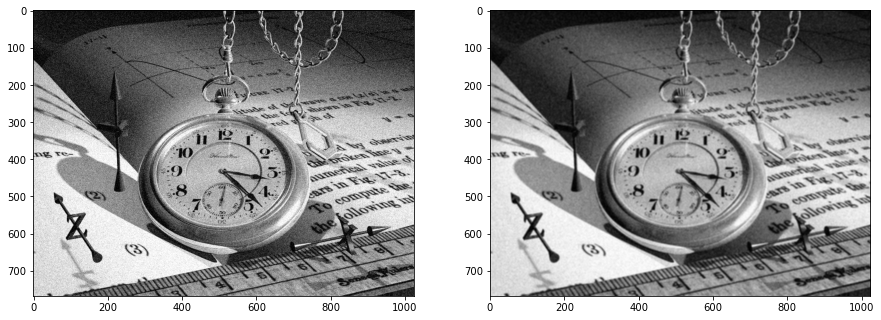

In [10]:
plt.subplot(1,2,1)
plt.imshow(J)
plt.subplot(1,2,2)
plt.imshow(A)

In [11]:
G=filters.rank.geometric_mean(J,np.ones((5,5)))

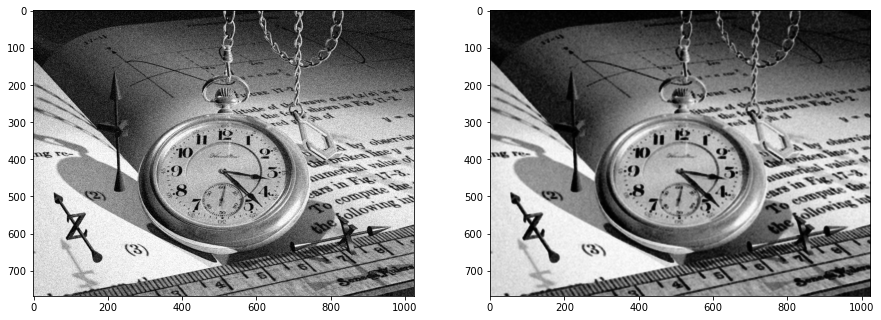

In [12]:
plt.subplot(1,2,1)
plt.imshow(J)
plt.subplot(1,2,2)
plt.imshow(G)

### Median filter

In [13]:
M = filters.rank.median(J,np.ones((5,5)))

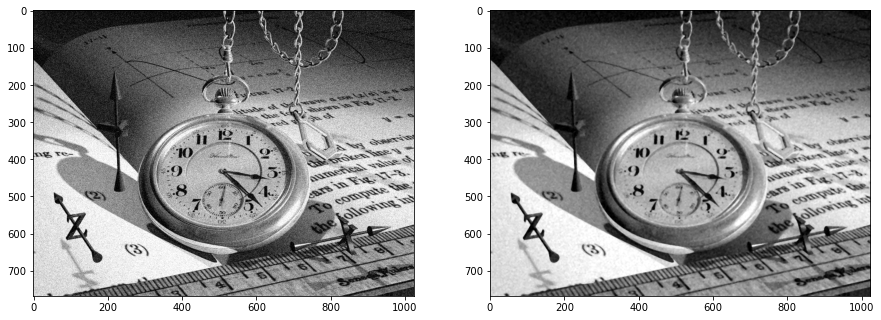

In [14]:
plt.subplot(1,2,1)
plt.imshow(J)
plt.subplot(1,2,2)
plt.imshow(M)

### Alfa-trimmed mean filter

In [15]:
P=filters.rank.mean_percentile(J,np.ones((5,5)),p0=0.2,p1=0.8)

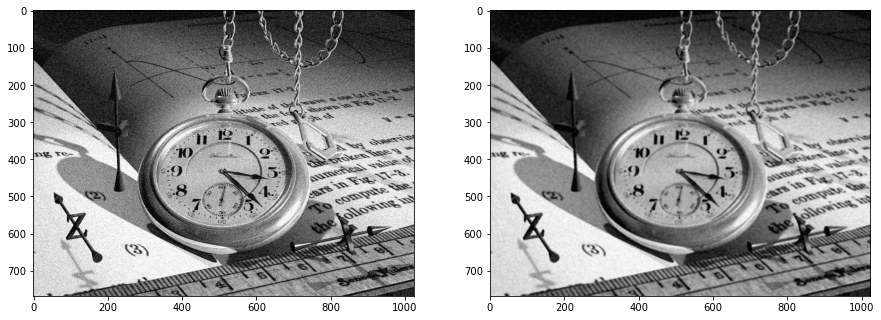

In [16]:
plt.subplot(1,2,1)
plt.imshow(J)
plt.subplot(1,2,2)
plt.imshow(P)

### Adaptive mean filter

In [17]:
from scipy.ndimage import convolve

def adaptive_filter(I, nvar, n):
    I = I.astype(float)/255
    filt = np.ones((n,n))/n/n
    mu = convolve(I,filt)
    lvar = convolve(I**2,filt) - mu**2
    r = np.clip(nvar/lvar,0,1)
    out = I - r*(I-mu)
    return out.clip(0,1)

In [18]:
A = adaptive_filter(J,0.01,15)

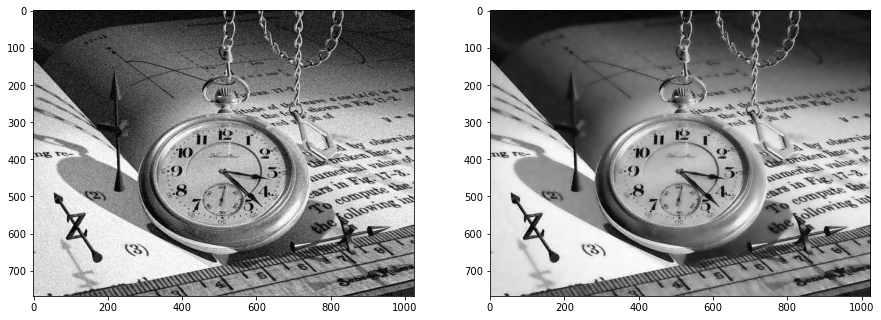

In [19]:
plt.subplot(1,2,1)
plt.imshow(J)
plt.subplot(1,2,2)
plt.imshow(A)

### Motion blur

In [20]:
psf = np.ones((1,15))/15

In [21]:
F = np.fft.fft2(I)
H = np.fft.fft2(psf,I.shape)

In [22]:
S = np.fft.ifft2(H*F).real

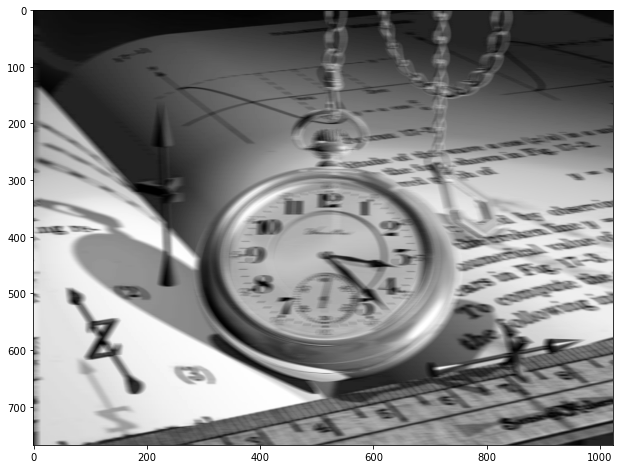

In [23]:
plt.imshow(S)

### Inverse filter

In [24]:
G = np.fft.fft2(S)

In [25]:
Fe = G/H

In [26]:
R = np.fft.ifft2(Fe).real.clip(0,1)

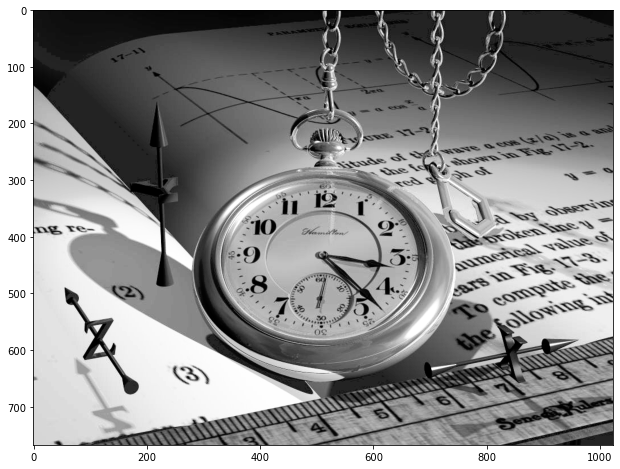

In [27]:
plt.imshow(R)

### Inverse filtering of a noisy image

In [28]:
S = util.random_noise(S,'gaussian',var=0.0001)

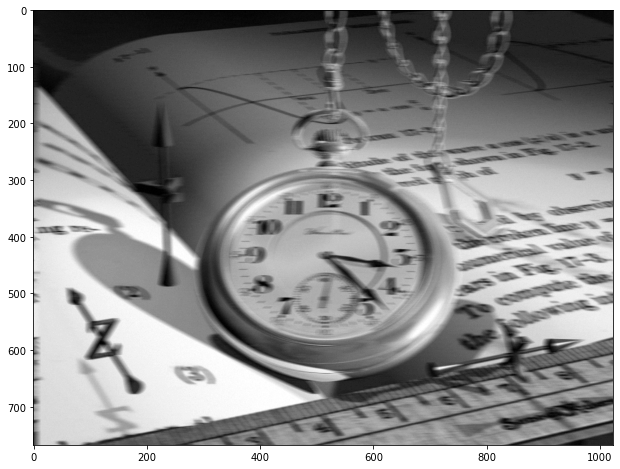

In [29]:
plt.imshow(S)

In [30]:
G = np.fft.fft2(S)
Fe = G/H
R = np.fft.ifft2(Fe).real.clip(0,1)

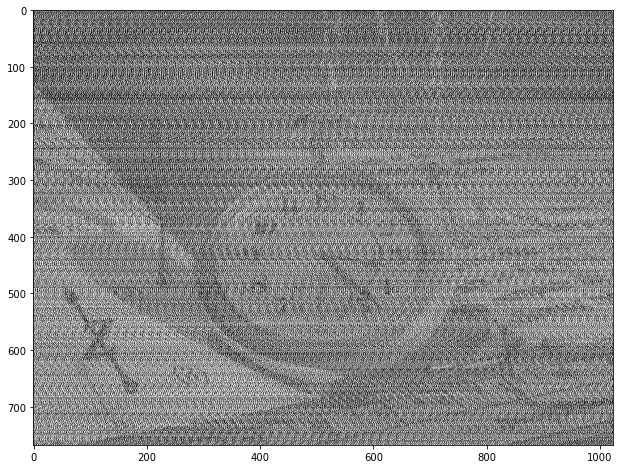

In [31]:
plt.imshow(R)

In [32]:
m,n = I.shape
u0 = np.fft.fftfreq(n)
v0 = np.fft.fftfreq(m)
u,v = np.meshgrid(u0,v0)

In [33]:
mask = u**2 + v**2 < 0.1**2

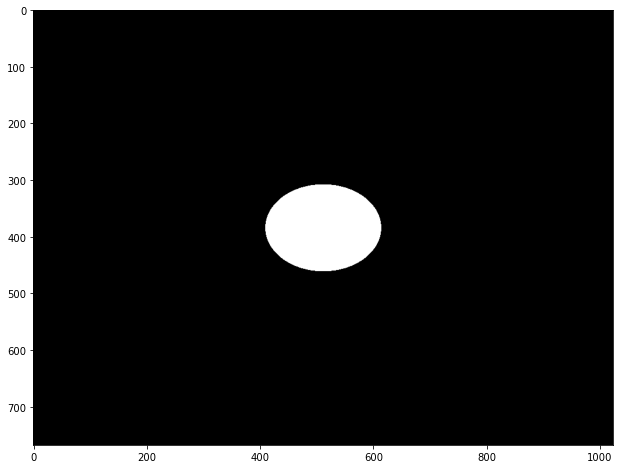

In [34]:
plt.imshow(np.fft.fftshift(mask))

In [35]:
Fe = np.copy(G)
Fe[mask] = Fe[mask]/H[mask]

In [36]:
R = np.fft.ifft2(Fe).real.clip(0,1)

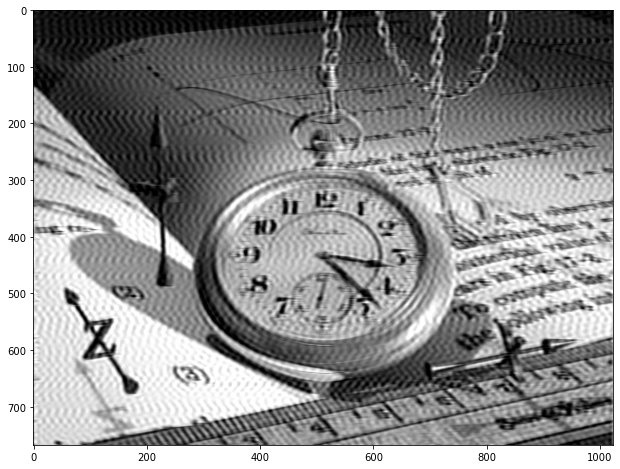

In [37]:
plt.imshow(R)

In [38]:
(I-R).std()

0.0931289990436708

In [39]:
(I-S).std()

0.13515153598863633

### Wiener filter

In [40]:
k = 0.005

In [41]:
Fe = 1/H*np.abs(H)**2/(np.abs(H)**2+k)*G

In [42]:
R = np.fft.ifft2(Fe).real.clip(0,1)

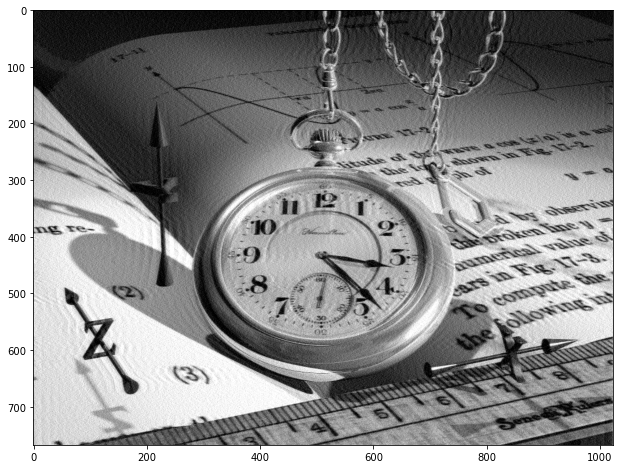

In [43]:
plt.imshow(R)

In [44]:
(I-R).std()

0.06769608380328754

### Constrained least squares filter

In [45]:
gamma = 2

In [46]:
L = -(u**2+v**2)

In [47]:
F = np.conj(H)/(np.abs(H)**2+gamma*np.abs(L)**2)*G

In [48]:
R = np.fft.ifft2(F).real.clip(0,1)

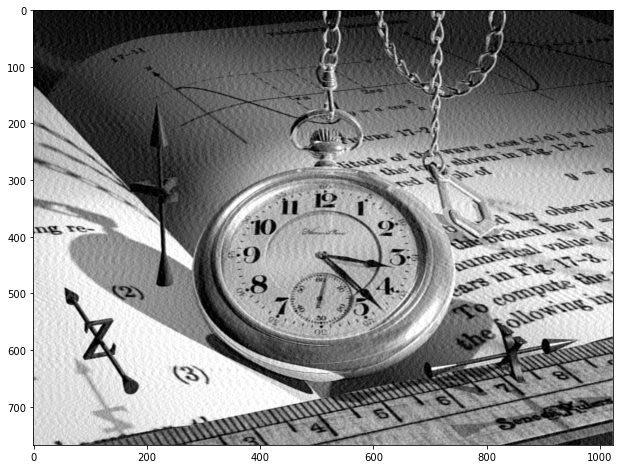

In [49]:
plt.imshow(R)

In [50]:
(I-R).std()

0.04973377130474238